<a href="https://colab.research.google.com/github/RuaaAhmed/RuaaAhmed/blob/main/project%22Ruaa%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0       low
1       low
2       low
3       low
4       low
       ... 
1211    low
1212    low
1213    low
1214    low
1215    low
Name: Cases_binning, Length: 1216, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']
count    1216.000000
mean       35.097862
std       111.747214
min         1.000000
25%         1.000000
50%         3.000000
75%        13.000000
max      1499.000000
Name: Cases, dtype: float64
count      3.000000
mean     405.333333
std      310.132767
min       69.000000
25%      268.000000
50%      467.000000
75%      573.500000
max      680.000000
Name: Indicator, dtype: float64
                Cases                                                \
region       Al Bahah   Al Jouf      Asir Eastern Region       Hail   
Indicator                                                             
Cases        2.666667  1.888889  4.702703      36.209459  12.181818   
Mortalities       NaN       NaN  2.000000       1.375000        NaN   
Recoveries   2.466667  1.

<function matplotlib.pyplot.show(*args, **kw)>

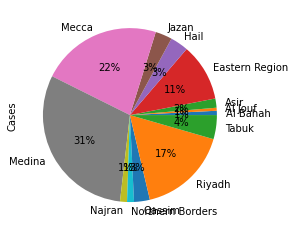

In [8]:
import pandas as myData
import numpy as np
import matplotlib.pyplot as plt

rData = myData.read_excel('SA-COVID19v1.xlsx', sheet_name = 'Sheet',skiprows = range(2), skipfooter = 29599)
Header =["Daily / Cumulative","Indicator","Date","Event","region","City","Cases"]
rData.columns = Header


#Check All Data Types
rData.dtypes


#Check All Statistical Matric of Dataset "we can not do it know because all data is object"


#drop unnecessary record (“Total”)
rData.set_index('City', inplace = True)
rData.drop("Total",axis=0,inplace=True)


#Save a New Data Frame after Changing
rData.to_excel("DATA1.xlsx")


#Check All Missing Values in 
rData.isna
rData["Cases"].replace("?", np.nan, inplace = True)
rData.dropna(subset=["Cases"],axis=0, inplace=True)


#Change Wrong Format in Dataset
rData.dtypes 


##rData['Cases'] = rData['Cases'].astype("float64")
##print(myData["Cases"].dtypes)


#Drop Attributes: Daily / Cumulative, Event
rData.drop(["Daily / Cumulative", "Event"],axis=1,inplace=True)


###Create Data Binning for Total Attribute → BTotal
rData.reset_index(inplace=True)
bins = np.linspace(min(rData["Cases"]), max(rData["Cases"]), 4)
g_names = ["low", "mid", "high"]
rData["Cases_binning"] = myData.cut(rData["Cases"], bins, labels=g_names, include_lowest = True)
print(rData["Cases_binning"])


#Descriptive Statistics:Para.: Indicator vs. Cases
print(rData["Cases"].describe())
count1 =rData["Indicator"].value_counts()
print(count1.describe())


#Grouping Data:Para.: Indicator vs.Region vs. Cases
Group_By =rData[["Indicator","region","Cases"]]
Group_By_Test = Group_By.groupby(["Indicator", "region"], as_index = False).mean()
Table_Data = Group_By_Test.pivot_table( columns='region',index='Indicator')
print(Table_Data)


##data for city and total cases
total=Table_Data.sum(axis=0)
Table_Data=Table_Data.append(total,ignore_index=True)
Table_Data.drop([0,1,2],axis=0,inplace=True)
Table_Data.columns=Table_Data.columns.droplevel(0)
Table_Data.columns.name= None
Table_Data=Table_Data.transpose()
Table_Data=Table_Data.reset_index()
Table_Data.rename(columns={'index':'region',3:'Cases'},inplace=True)
#print(Table_Data)



# Pie chart to draw total cases in regions.
Table_Data.set_index('region', inplace = True)
Table_Data['Cases'].plot(kind='pie',autopct='%.0f%%')
plt.show
